# A workflow for exploring TEDS-A

### A final project to fulfill the requirements of "Applied Data Science for Practitioners" at 
#### Washington University in St. Louis

### Author: Mason T. Breitzig

##### Instructor: Asim Banskota

##### Date: 4/30/20

## Overview of the workflow and project

### Purpose of this workflow

Many national datasets are updated annually with survey results from the previous year. The "Treatment Episode Admissions Data Set" (TEDS-A) is one such example. This survey is updated anually to provide data on admissions to substance abuse treatment facilities. It is backed by state laws, requiring collection and reporting of data from all publically-funded facilities. It also includes some data from privately funded facilities. 

Although the yearly data is sometimes merged with previous years, there is often a delay in the preparation of the combined datasets. The merged datasets also include all variables from all years, which can result in unwieldy file sizes. Rather than wait for the data to be merged by the managing organization, and to avoid battling with data wrangling as much as possible, this workflow focuses on automating the process in order to produce a curated dataset and associated models based on selected variables and informed user imput (business objective).

More specifically, this workflow is tailored to the TEDS-A data and will run through a standard selection of data science processes as follows (outline of steps): 

1. Merge previous years with the most current data release, 
2. Select desired variables and drop all others, 
3. Conduct standard pre-processing procedures (including imputation and feature engineering), 
4. Generate descriptive and visual analyses of the data (exploratory data analysis), 
5. Conduct modelling, 
6. Evaluation and model selection, and 
7. Export (and deploy) the data and models. 

These objectives will be acomplished from mostly a data science point of view rather than a statistical one. Although some model assumptions and diagnostics will be observed, the overall purpose is to predict an outcome with the greatest accuracy achieveable while still maintaining a research point of view regarding variable parsimony. 

Furthermore, this workflow has two critical assumptions of its own: 1) the TEDS-A dataset(s) are based on surveys that are generally the same with few changes year-to-year (note that diagnosis criteria may change); 2) the user has a basic understanding of the dataset from the available documentation and has a pre-determined question. The user will be required to supply the separate datasets for merging as well as the variables of interest. For further simplification, the user will also be queried for input on data wrangling and other steps. The result will be a curated dataset and models tailored to the needs of the user.

### Example use of this workflow

In order to demonstrate the power and utility of this workflow, I have selected a particular research question that I would like to explore in the TEDS-A dataset (research/academic objective). I am aware that the TEDS-A dataset includes information on  patients' mental health status based on diagnosis using the Diagnostic and Statistical Manual of Mental Disorders (DSM). Accordingly, I would like to determine whether the variables in this dataset, and particularly patterns and types of drugs used and arrest, can accurately predict certain mental health diagnoses. Building models to help facilitate medical diagnosis, or at least the appropriation of medical services, is an important task for further improving our ability to manage the well-being of a growing population (Cho, Yim, Choi, Ko, & Lee, 2019).

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Set directory
PROJ_DIR = r"C:/Users/mbrei/Desktop/ADS_2020"
DATA_DIR = os.path.join(PROJ_DIR, 'src/data')

# Set directory of the source code
import sys
sys.path.append(os.path.join(PROJ_DIR, 'src'))

## Step 1 - Data Import & Merging

### Data import and merging overview:

The purpose of this step is to allow the user to import multiple years of TEDS-A data and merge them into a single dataset. This is useful for conducting specific multi-year analyses. However, this step assumes that the user is aware of any differences in the data across years. 

For example, in 2010 the survey might have requested data on whether or not an individual used psychedelics; whereas in 2016, psychedelics may be broken down into different types of drugs (e.g. psilocybin, LSD, peyote, etc.) to obtain more nuanced data. This type of inconsistency (i.e. gaps in the data across years) can quickly result in the inability to conduct meaningful analyses. Although the workflow incorporates a brief reminder, it largely assumes the user is attempting to merge datasets that have at least some non-demographic variables in common.

### Example for Step 1

For demonstration of this workflow, we will attempt to import and merge TEDS-A data from 2015, 2016, and 2017 (2017 is the most current data available publically). For the time being and simplicity's sake, the workflow currently allows a maximum of five separate data files to be merged. We will be using three separate data files since years 2015-2017 of TEDS-A collected data on the same variables. This will also allow demonstration of how to merge less than five datasets. Though the code allows import and merging of a large number of files.

All of the data is publically available and can be downloaded from: https://www.datafiles.samhsa.gov/study-series/treatment-episode-data-set-admissions-teds-nid13518

Three randomly sampled and downsized versions of the 2015, 2016, and 2017 datasets are also available in the github repository for this workflow (code for the sampling/truncation also available in a separate notebook): https://github.com/mbreitzig/ADS_2020

These truncated files were used in the demonstration below and each represent 5% of their original data to total just over 1 million observations for the three datasets combined.

### Import and merge the data

Users are asked to create a local directory and store all relevant TEDS-A .csv files in the new directory. The directory can then be entered and will be used by the workflow to import all TEDS-A data files and merge them. Since TEDS-A is a dataset with strict criteria, it should always be in a relatively standard format with a unique ID for each observation. The merging process assumes that the user is importing and merging TEDS-A data. Attempting to import other (incompatible) data might cause an error or result in messy/unuseable data.

Functionality for importing TEDS-A data via URL could be added in the future. However, this poses a challenge as the data usually requires a user agreement. It is also a somewhat superfluous functionality given that the data would still need to be downloaded into a directory prior to import. Therefore, the following code only supports importing from a local folder.

For the example, utilize a path similar to the following: C:/Users/mbrei/Desktop/ADS_2020/src/data

In [2]:
# Grab the data and merge
from teds_script import import_data
TEDS_A_merged = import_data()

Please enter the path for the local folder that contains csv-format TEDS-A datasets you wish to import and merge.
Hit enter to submit (all .csv files in the folder will be imported); example: C:/users/name/desktop/datafolder
C:/Users/mbrei/Desktop/ADS_2020/src/data


In [3]:
TEDS_A_merged

,ADMYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,NOPRIOR,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2015,20150885002,36,35620,1,-9,2,-9,-9,1,...,0,0,0,0,0,0,2,1,0,3
1,2015,20151108862,51,32300,3,-9,7,-9,0,7,...,0,0,0,0,0,0,5,3,-9,0
2,2015,20150487840,36,35620,5,-9,2,-9,-9,1,...,0,0,0,0,0,0,2,1,-9,1
3,2015,20151166794,24,-9,3,1,7,-9,0,1,...,0,0,0,0,0,0,5,3,-9,0
4,2015,20150971083,1,-9,4,1,2,-9,1,1,...,0,0,0,0,0,0,6,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288122,2017,20170816664,36,35620,3,-9,2,-9,-9,1,...,0,0,0,0,0,0,2,1,-9,3
288123,2017,20171213059,37,20500,4,1,5,-9,0,1,...,0,0,0,0,0,0,5,3,1,2
288124,2017,20171286362,40,-9,3,1,2,-9,0,1,...,0,0,0,0,0,0,7,3,1,2
288125,2017,20171054306,40,-9,3,1,7,1,0,7,...,0,0,0,0,0,0,7,3,1,3


## Step 2 - Exploratory Data Analysis (EDA)

### EDA overview:

The purpose of this step is to take a first look at the data. Now that the data have been merged we can begin to look for important associations. This will inform which variables we wish to keep going forward (if not all). The workflow will automatically generate some plots for the variables in the data. However, the user can also generate additional plots to explore their own interests in the data.

For this example, we will be most interested in plotting the relation between some drug variables and mental health diagnoses as well as the distribution of mental health diagnoses across certain sociodemographic variables.

1. Please copy-paste and enter: DSMCRIT
2. Please copy-paste and enter: EDUC GENDER AGE RACE SUB1 ARRESTS

Remember to refer to the TEDS-A codebook (in the main directory of the repository) to make sense of the numeric categories. Since the data are already in numeric format, it is easier to pass them through preprocessing before recoding. Unfortunately, this means the EDA may be more tedious.

You now have the option to explore some descritive info and associations.
Please enter the Y (dependent) and X(s) of interest (a smaller number will be easier to examine).
Enter the column/variable names separated by a space and not a comma, example: EDUC MARSTAT

Enter the Y variable

DSMCRIT

Enter the X variable(s)

EDUC GENDER AGE RACE SUB1 ARRESTS


,DSMCRIT
count,126895
unique,19
top,5
freq,41733


,EDUC,GENDER,AGE,RACE,SUB1,ARRESTS
count,126895,126895,126895,126895,126895,126895
unique,5,2,12,9,19,3
top,3,1,5,5,2,0
freq,62265,81482,23340,87903,40830,117458


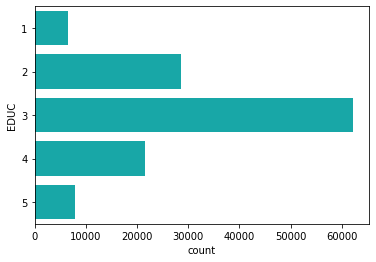

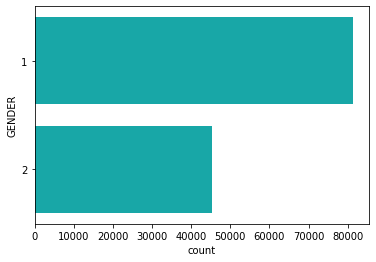

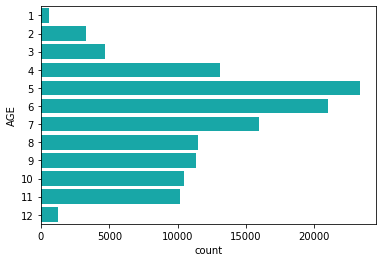

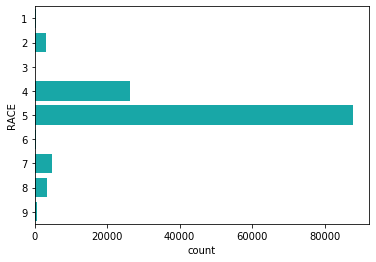

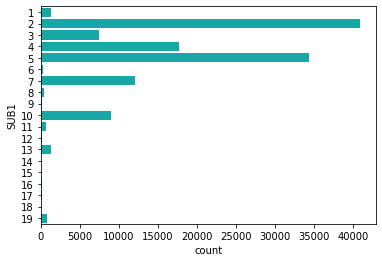

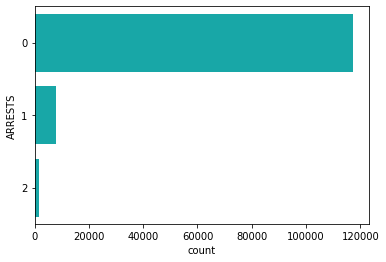

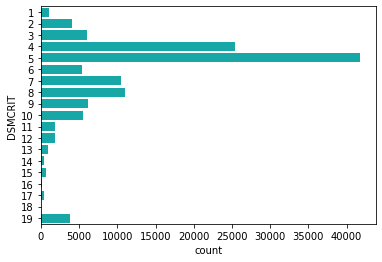

In [4]:
# Grab the EDA function
from teds_script import EDA
user_XY_list, info1, info2, TEDS_Ana, user_target, user_X_list = EDA(TEDS_A_merged)

# Cleanly print the info
pd.DataFrame(info1)
pd.DataFrame(info2)

# Generate the plots
for i in user_XY_list:
    sns.countplot(y=TEDS_Ana[i], data=TEDS_Ana, color="c")
    plt.show()

In [5]:
# Grab the crosstabs function
from teds_script import crosstabs

# Cleanly print the crosstabs
crosstabs_out = crosstabs(TEDS_Ana, user_target, user_X_list)
for ctabs in crosstabs_out:
    crosstabs_out[ctabs]

EDUC,1,2,3,4,5
DSMCRIT,,,,,
1,62,193,510,201,97
2,205,911,1987,749,213
3,511,759,2966,1123,668
4,1048,4313,12505,5177,2406
5,1656,9322,21874,6438,2443
6,274,1320,2586,879,258
7,749,3635,4624,1244,233
8,575,2609,5578,1816,393
9,332,1112,2990,1228,472


GENDER,1,2
DSMCRIT,,
1,724,339
2,2582,1483
3,4754,1273
4,17954,7495
5,24426,17307
6,3279,2038
7,7491,2994
8,6066,4905
9,4308,1826


AGE,1,2,3,4,5,6,7,8,9,10,11,12
DSMCRIT,,,,,,,,,,,,
1,8,19,33,86,153,153,139,117,115,114,110,16
2,15,97,200,492,855,721,542,361,290,252,207,33
3,12,6,133,397,642,706,678,616,786,890,1022,139
4,15,102,359,1522,2994,3565,3295,3034,3370,3453,3351,389
5,4,91,954,4436,9932,8302,5391,3440,3228,2743,2862,350
6,1,19,81,257,578,661,725,641,864,801,633,56
7,204,1266,1196,1963,2179,1443,941,515,351,246,172,9
8,8,165,477,1385,2321,2255,1661,1049,780,479,365,26
9,37,180,256,701,1009,929,772,580,530,517,527,96


RACE,1,2,3,4,5,6,7,8,9
DSMCRIT,,,,,,,,,
1,10,12,2,206,765,5,39,23,1
2,5,69,5,640,3138,13,43,143,9
3,103,529,0,750,4472,38,15,89,31
4,149,1082,12,4736,17563,83,968,776,80
5,36,279,6,6677,32119,94,1283,1133,106
6,2,63,1,2567,2265,16,194,197,12
7,16,221,6,4071,5272,35,520,266,78
8,18,353,3,1019,8750,102,254,271,201
9,34,209,6,1264,4040,46,316,172,47


SUB1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
DSMCRIT,,,,,,,,,,,,,,,,,,,
1,22,865,21,44,55,1,30,1,0,11,0,1,8,0,0,0,0,0,4
2,66,366,314,431,1256,20,515,10,12,788,38,12,72,0,3,6,6,1,149
3,10,5981,4,9,8,0,3,0,0,8,0,1,1,0,0,0,0,0,2
4,250,23416,381,494,391,5,194,17,7,148,24,2,53,0,4,7,6,8,42
5,241,837,516,447,29094,239,9572,11,19,283,43,14,265,3,5,23,5,13,103
6,67,350,4367,170,237,0,59,5,4,24,3,17,10,0,0,1,0,0,3
7,111,458,173,9087,254,2,133,19,6,133,15,3,27,1,2,3,4,5,49
8,150,688,259,576,554,15,450,260,76,6230,439,71,715,5,13,101,32,18,319
9,59,5513,76,297,56,0,37,4,2,51,5,4,9,0,2,3,1,0,15


ARRESTS,0,1,2
DSMCRIT,,,
1,995,56,12
2,3779,226,60
3,5711,262,54
4,23477,1657,315
5,39094,2179,460
6,4999,260,58
7,9562,790,133
8,9721,1067,183
9,5615,451,68


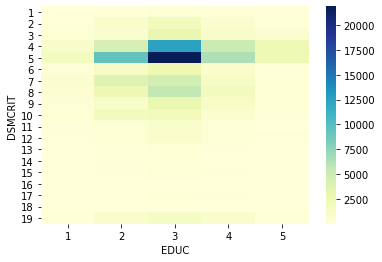

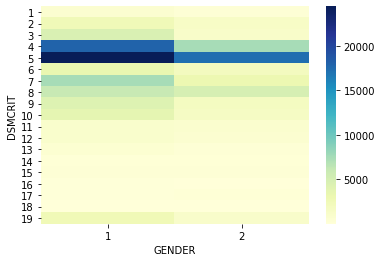

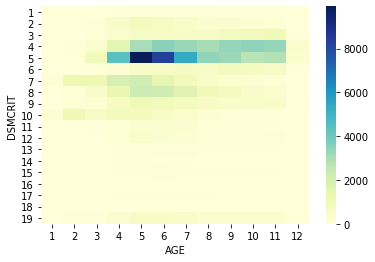

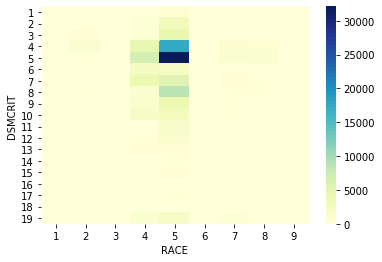

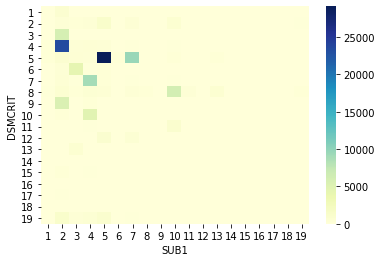

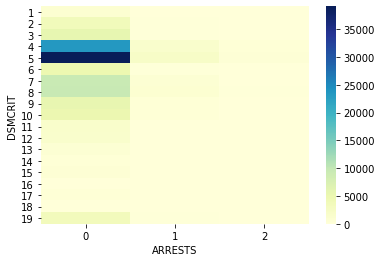

In [6]:
# Grab the visual crosstabs function
from teds_script import vis_crosstabs

# Cleanly print the visual crosstabs
vis_crosstabs_out = vis_crosstabs(TEDS_Ana, user_target, user_X_list)
for vctabs in vis_crosstabs_out:
    vis_crosstabs_out[vctabs]

## Step 3 - Data Truncation / Selection

### Data truncation / selection overview:

The purpose of this step is to allow the user to drop variables they deem unecessary for the aims of their analysis. This is a common step in research-focused analyses. However, it is less in data-science which typically aims to build the most accurate predictive model (involving all available data).

### Example for Step 3

To demonstrate the utility of this workflow and keep the analysis simple, we will drop several variables. The user can specify as many variables as desired to be kept during this step. Here we will keep only the following variables to determine the relation between drug use and mental health on admission to a treatment facility:

1) Please copy and paste: ADMYR CASEID AGE EDUC ALCFLG RACE ETHNIC GENDER SUB1 SERVICES DSMCRIT ARRESTS

With greater processing power and time, it is possible to analyze all of the variables in the TEDS-A dataset. This selection of variables was made due to the interest in predicting mental health diagnosis based on the primary substance and some other select factors. It is in the best interest to try and predict the outcome (diagnosis) with as little information as possible since a patient's record may not always be complete and/or they may not be able/willing to provide certain information.

In [7]:
# Grab the drop function
from teds_script import drop_data

# Run the drop function
TEDS_A = drop_data(TEDS_A_merged)

You now have the option to keep specific variables from the data (type 'NA' to skip). 
Please use the TEDS-A codebook or the list generated to enter the names of variables you wish to keep.) 
Enter the column/variable names separated by a space and not a comma, example: CASEID EDUC MARSTAT

Currently available columns:  ['ADMYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES', 'DETCRIM', 'NOPRIOR', 'PSOURCE', 'ARRESTS', 'EMPLOY', 'METHUSE', 'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'DSMCRIT', 'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'ROUTE1', 'ROUTE2', 'ROUTE3', 'FREQ1', 'FREQ2', 'FREQ3', 'FRSTUSE1', 'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG', 'DIVISION', 'REGION', 'IDU', 'ALCDRUG']


ADMYR CASEID AGE EDUC ALC

In [8]:
TEDS_A

,ADMYR,CASEID,AGE,EDUC,ALCFLG,RACE,ETHNIC,GENDER,SUB1,SERVICES,DSMCRIT,ARRESTS
0,2015,20150885002,10,1,1,7,1,1,2,2,NaN,NaN
1,2015,20151108862,5,3,0,5,4,1,NaN,7,NaN,0
2,2015,20150487840,11,5,1,5,4,1,2,2,NaN,NaN
3,2015,20151166794,11,3,0,4,4,1,NaN,7,8,0
4,2015,20150971083,6,4,0,5,4,1,7,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
288122,2017,20170816664,11,3,1,4,4,1,2,2,19,NaN
288123,2017,20171213059,7,4,0,5,4,1,5,5,6,0
288124,2017,20171286362,4,3,0,5,4,1,7,2,5,0
288125,2017,20171054306,8,3,1,5,4,1,10,7,11,0


## Step 4 - Data Pre-processing

### Data pre-processing overview:

The purpose of this step is to prepare the data for analysis. Pre-processing is a common step that involves recoding of values, data type reassignment (e.g. integer to string), imputation, feature engineering, and a range of other actions that occur before modelling.

This step will enable the user to tailor the data to their needs and conduct some standard preprocessing procedures.

To demonstrate the functionality of this step, we will walk through each substep with the objective (research question) of predicting mental health diagnosis.

### Step 4.1 - Target Selection & Multiple Imputation

The purpose of this step is to impute missing values. This can be done using a range of methods. Since the data in the TEDS-A datasets are dependent on patient/hospital records it is possible that some missing values are missing completely at random MCAR). However, self-report and interviewer biases are also very likely in this type of data. Therefore, this workflow will treat all missing values as missing not at random (MNAR)

For this type of missing data, it is necessary to use methods that are more advanced than replacement with central mean tendencies. This workflow will utilize 'IterativeImputer.' This experimental imputer models each variable with missing observations as a function of other variables until all selected missing values have been imputed.

More info on this method can be found at: 
https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

This step is conducted before recoding since categorical variables can be difficult to handle alongside numeric variables when conducting multiple imputation. Additionally, up to this point the outcome has been ambiguous. During this step, the user will be asked to select a target variable. This will later facilitate splitting the data into training and testing sets (80% to 20%, respectively).

This step also converts the non-standard missing value of -9 to NaN. At this time, TEDS-A codes all missing observations as -9. Therefore this code automatically imports the data recognizing -9 as NaN. It is easier to handle this pre-processing step here than later in the workflow.

In [9]:
TEDS_A.isna().sum()

ADMYR            0
CASEID           0
AGE              0
EDUC         16258
ALCFLG           0
RACE          6071
ETHNIC        8278
GENDER         133
SUB1          5173
SERVICES         0
DSMCRIT     146191
ARRESTS      49851
dtype: int64

In [10]:
# Grab the imputation function
from teds_script import imputation

# Multiple imputation using Iterative Imputer
TEDS_A_Imputed = imputation(TEDS_A)

In [11]:
TEDS_A_Imputed.isna().sum()

ADMYR       0
CASEID      0
AGE         0
EDUC        0
ALCFLG      0
RACE        0
ETHNIC      0
GENDER      0
SUB1        0
SERVICES    0
DSMCRIT     0
ARRESTS     0
dtype: int64

### Step 4.2 - Feature Engineering

The purpose of this step is to generate some features for unique analyses. Note that this step occurs before the official "data cleaning step" since the TEDS-A data is stored in a cleaned format that is appropriate for generation of polynomial features (or in this case interaction terms for categorical variables).

In the field of public health, and especially mental health, it is common for sociodemogrphic variables to demonstrate meaningful interactions. For example, someone who is a White male may face fewer health complications compared to a Black male, but especially fewer than a Black female (Silva, Loureiro, & Cardoso, 2016). This indicates that interaction terms among sociodemographic variables may reveal additional details within the data. It is also possible that interactions of sociodemographics with other variables in the data may reveal hidden interactions that explain more nuance of the data.

Specifically, in this example we will use sklearn to generate 2-degree polynomial features for the variables selected by the user. Allowing the user to specify which features to engineer is essential for both data science based objectives (e.g. highest accuracy prediction) and public health research (parsimonious consideration of interaction terms). 

For the example, we will enter the sociodemographic variables as well as the ARRESTS variable. The is based on the hypothesis that the patterns of arrest may be different between individuals of varying races, ethnicities, education levels, etc. and that this may impact the distributions of mental health (Silva, Loureiro, & Cardoso, 2016).

1) Please copy and paste: EDUC ARRESTS GENDER RACE

In [12]:
# Grab the feature engineering function
from teds_script import user_interactions

# Run the feature engineering function
TEDS_Af = user_interactions(TEDS_A_Imputed)

You now have the option to generate polynomial features for variables of interest (enter NA to skip). 
Please use the TEDS-A codebook or the list generated to enter the names of variables of interest.
 
Enter the column/variable names separated by a space and not a comma, example: CASEID EDUC MARSTAT

Currently available columns:  ['ADMYR', 'CASEID', 'AGE', 'EDUC', 'ALCFLG', 'RACE', 'ETHNIC', 'GENDER', 'SUB1', 'SERVICES', 'DSMCRIT', 'ARRESTS']


EDUC ARRESTS GENDER RACE


In [13]:
# Display the current data with polynomial features
TEDS_Af

,EDUC ARRESTS,EDUC GENDER,EDUC RACE,ARRESTS GENDER,ARRESTS RACE,GENDER RACE
0,0.0,1.0,7.0,0.0,0.0,7.0
1,0.0,3.0,15.0,0.0,0.0,5.0
2,0.0,5.0,25.0,0.0,0.0,5.0
3,0.0,3.0,12.0,0.0,0.0,4.0
4,0.0,4.0,20.0,0.0,0.0,5.0
...,...,...,...,...,...,...
288122,0.0,3.0,12.0,0.0,0.0,4.0
288123,0.0,4.0,20.0,0.0,0.0,5.0
288124,0.0,3.0,15.0,0.0,0.0,5.0
288125,0.0,3.0,15.0,0.0,0.0,5.0


### Step 4.3 - Data Cleaning

The purpose of this step is to ensure that the variables and their values are in the proper format. For the TEDS-A dataset, this means we need to check the variable types and recode any leveled (e.g. factor) variables with their proper categorical label. This can be handled without user input since the TEDS-A data rarely changes variables and/or data format. It is reasonable for this program to be updated to handle changes in the TEDS-A data given the low frequency of change.

Therefore, this iteration of the program will focus on properly pre-processing the TEDS-A data based on the codebook from years 2015-2017. Note that the pre-processing accuracy is liable to be affected by changes/variations in the TEDS-A data format in future years. For the time being, this workflow will also not handle any variables that were present in the years before 2015, but not included in 2015-2017.

This step will also give meaningful labels to the data for better understanding.

#### Note:

One issue with the TEDS-A dataset is that all variables are coded to be numeric when in fact many of them are actually categorical. This necessitates a substantial amount of recoding in order to be logical. This recoding process will be executed automatically by the workflow for variables present in the 2015-2017 datasets (based on the codebook).

Furthermore, not all variables that should be recoded currently have code implimented for recoding. Future iterations of this workflow could include additional recoding procedures.

In [14]:
# Grab the data cleaning function
from teds_script import var_recode

# Run the data cleaning function
TEDS_A_Imputed, col_list_cat, col_list_ord, col_list_cat_f = var_recode(TEDS_A_Imputed, user_target, TEDS_Af)

In [15]:
TEDS_A_Imputed

,ADMYR,CASEID,AGE,EDUC,ALCFLG,RACE,ETHNIC,GENDER,SUB1,SERVICES,DSMCRIT,ARRESTS
0,2015.0,20150885002,50–54 years,8 years or less,1.0,Other single race,Puerto Rican,1.0,2.0,"Detox, 24-hour, free-standing residential",Opioid dependence,0.0
1,2015.0,20151108862,25–29 years,12 years (or GED),0.0,White,Not of Hispanic or Latino origin,1.0,6.0,"Ambulatory, non-intensive outpatient",Cocaine dependence,0.0
2,2015.0,20150487840,55–64 years,16 years or more,1.0,White,Not of Hispanic or Latino origin,1.0,2.0,"Detox, 24-hour, free-standing residential",Alcohol dependence,0.0
3,2015.0,20151166794,55–64 years,12 years (or GED),0.0,Black or African American,Not of Hispanic or Latino origin,1.0,6.0,"Ambulatory, non-intensive outpatient",Other substance dependence,0.0
4,2015.0,20150971083,30–34 years,13–15 years,0.0,White,Not of Hispanic or Latino origin,1.0,7.0,"Detox, 24-hour, free-standing residential",Opioid dependence,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
288122,2017.0,20170816664,55–64 years,12 years (or GED),1.0,Black or African American,Not of Hispanic or Latino origin,1.0,2.0,"Detox, 24-hour, free-standing residential",Other mental health condition,0.0
288123,2017.0,20171213059,35–39 years,13–15 years,0.0,White,Not of Hispanic or Latino origin,1.0,5.0,"Rehab/residential, (more than 30 days)",Cocaine dependence,0.0
288124,2017.0,20171286362,21–24 years,12 years (or GED),0.0,White,Not of Hispanic or Latino origin,1.0,7.0,"Detox, 24-hour, free-standing residential",Opioid dependence,0.0
288125,2017.0,20171054306,40–44 years,12 years (or GED),1.0,White,Not of Hispanic or Latino origin,1.0,10.0,"Ambulatory, non-intensive outpatient",Other substance abuse,0.0


### Step 4.4 - Feature Engineering Part 2

This step serves as an optional step to collapse categories of the target variable. This is often a crucial step for simplifying target variables. Here we will collapse the target variable DSMCRIT into three categories:

1) Please copy and paste: Reference

2) Please copy and paste: Alcohol dependence

3) Please copy and paste: Depressive disorders

This will set 17 out of the 19 variables as the "other" or "reference" category. The user can select any desired combination of three categories.

In [16]:
# Grab the second feature engineering function
from teds_script import combine_levels

# Run the second feature engineering function
TEDS_A_Imputed, user_combined1, user_combined2, user_combined3 = combine_levels(user_target, TEDS_A_Imputed)

You now have the option to collapse your target variable levels (type 'NA' to skip).
Please enter up to three categories for your new level recoding. The reference is the first entry.
Currently available levels in DSMCRIT: ['Opioid dependence', 'Cocaine dependence', 'Alcohol dependence', 'Other substance dependence', 'Cocaine abuse', 'Alcohol abuse', 'Other substance abuse', 'Substance-induced disorder', 'Cannabis abuse', 'Cannabis dependence', 'Depressive disorders', 'Alcohol intoxication', 'Opioid abuse', 'Other mental health condition', 'Alcohol-induced disorder', 'Bipolar disorders', 'Schizophrenia/other psychotic disorders', 'Anxiety disorders', 'Attention deficit/disruptive behavior disorders']


Reference
Alcohol dependence
Depressive disorders


In [17]:
TEDS_A_Imputed

,ADMYR,CASEID,AGE,EDUC,ALCFLG,RACE,ETHNIC,GENDER,SUB1,SERVICES,DSMCRIT,ARRESTS
0,2015.0,20150885002,50–54 years,8 years or less,1.0,Other single race,Puerto Rican,1.0,2.0,"Detox, 24-hour, free-standing residential",0,0.0
1,2015.0,20151108862,25–29 years,12 years (or GED),0.0,White,Not of Hispanic or Latino origin,1.0,6.0,"Ambulatory, non-intensive outpatient",0,0.0
2,2015.0,20150487840,55–64 years,16 years or more,1.0,White,Not of Hispanic or Latino origin,1.0,2.0,"Detox, 24-hour, free-standing residential",1,0.0
3,2015.0,20151166794,55–64 years,12 years (or GED),0.0,Black or African American,Not of Hispanic or Latino origin,1.0,6.0,"Ambulatory, non-intensive outpatient",0,0.0
4,2015.0,20150971083,30–34 years,13–15 years,0.0,White,Not of Hispanic or Latino origin,1.0,7.0,"Detox, 24-hour, free-standing residential",0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
288122,2017.0,20170816664,55–64 years,12 years (or GED),1.0,Black or African American,Not of Hispanic or Latino origin,1.0,2.0,"Detox, 24-hour, free-standing residential",0,0.0
288123,2017.0,20171213059,35–39 years,13–15 years,0.0,White,Not of Hispanic or Latino origin,1.0,5.0,"Rehab/residential, (more than 30 days)",0,0.0
288124,2017.0,20171286362,21–24 years,12 years (or GED),0.0,White,Not of Hispanic or Latino origin,1.0,7.0,"Detox, 24-hour, free-standing residential",0,0.0
288125,2017.0,20171054306,40–44 years,12 years (or GED),1.0,White,Not of Hispanic or Latino origin,1.0,10.0,"Ambulatory, non-intensive outpatient",0,0.0


### Step 4.5 - Data Cleaning Part 2

This step serves to conduct one-hot encoding and ordinal encoding for the variables in the data. Since TEDS-A is fairly standard, as mentioned previously, the admission year, age, education, and arrests will be coded as ordinal while all other variables will be treated as categorical. The case ID variable will be excluded from recoding. This step essentially is the final preparation for modeling.

In [18]:
# Grab the second data cleaning function
from teds_script import cleaning_pt2

# Run the second data cleaning function
TEDS_Aicf = cleaning_pt2(TEDS_A_Imputed, TEDS_Af, col_list_cat, col_list_cat_f, col_list_ord)

In [19]:
TEDS_Aicf

,CASEID,ADMYR,AGE,EDUC,ARRESTS,DSMCRIT,ALCFLG_0.0,ALCFLG_1.0,"RACE_Alaska Native (Aleut, Eskimo, Indian)",RACE_American Indian (other than Alaska Native),...,GENDER RACE_5.0,GENDER RACE_6.0,GENDER RACE_7.0,GENDER RACE_8.0,GENDER RACE_9.0,GENDER RACE_10.0,GENDER RACE_12.0,GENDER RACE_14.0,GENDER RACE_16.0,GENDER RACE_18.0
0,20150885002,0.0,9.0,3.0,0.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,20151108862,0.0,4.0,0.0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20150487840,0.0,10.0,2.0,0.0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,20151166794,0.0,10.0,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20150971083,0.0,5.0,1.0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288122,20170816664,2.0,10.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
288123,20171213059,2.0,6.0,1.0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
288124,20171286362,2.0,3.0,0.0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
288125,20171054306,2.0,7.0,0.0,0.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### Step 4.6 - Standardization

It is common for studies/analyses to standardize or conduct other transformations on numeric data. These types of actions can make it easier to visualize associations or compare different data. However, this step requires that the data be essentially continuous. Although several of the variables in TEDS-A may appear to be continuous variables, they are in fact categorical. Several of the variables have a large number of categories, but are still considered ordinal data. For example, age may be continous in some data sets, but in TEDS-A it is a series of several categories with a meaningful order. 

Given that there is no indication of the format of TEDS-A changing to inlude continuous variables, this step will be skipped for now. If it is needed in the future, it would be implimented by allowing the user to plot continous variables and then decide whether to transform them with a selection of functions such as the 'MinMaxScaler' from sklearn.

## Step 5 - Modelling

### Modelling overview:

The purpose of this step is to take the curated data and generate models for the user's target variable. Since all of the variables in the TEDS-A data are categorical or ordinal, the selection of model options is simplified. 

In this example we will generate a baseline model using the default settings of a random forest classifier from sklearn. We will then test a range of hyperparmeters for tuning using the random grid search method. Based on this output, a new model will be generated using the optimal hyperparameters.

Finally, the models will be examined (compared) and explored.

### Step 5.1 Train/Test Splitting

We will first split the data. The workflow allows the user to specify the percentage of splitting. It is recommended that the test data set size be between 20 and 40 percent. This will specify the percentage of the testing data.

In [20]:
# Grab the train/test split function
from teds_script import user_split

# Run the train/test split function
TEDS_X_train, TEDS_X_test, TEDS_Y_train, TEDS_Y_test, y_list, = user_split(TEDS_Aicf, user_target)

You can now specify the percent split for training and testing data.

Enter the percentage of data you wish to be testing as an integer. Example: 20 would translate to a testing dataset of 20%.

25
Training and testing datasets were created with 75% and 25% of the original data.


### Step 5.2 Model Building & Hyperparameter Tuning

As mentioned, this step tunes the hyperparameters of the random forest classifier. For this workflow, we tune the n_estimators, the max_depth, and the min_samples_leaf. Once the tuning is complete, we re-run the model with the revised hyperparameters.

In [21]:
# Grab the model building and hyperparameter tuning function
from teds_script import model_building

# Run the model building and hyperparameter tuning function
Y_pred, Y_pred_randomsearch, best_grid_randomsearch = model_building(TEDS_X_train, TEDS_Y_train, TEDS_X_test)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.5min finished


## Step 6 - Evaluation & Model Selection

### Evaluation overview:

Evaluation of the models is a critical step. It allows us to decide whether we have achieved our objective. For this workflow, a model that is highly predictive may have some applicability to the medical field (with substantial testing/vetting). 

Here we evaluate the baseline model and the model with tuned hyperparameters by comparing the mean absolute error and the accuracy score. We would expect the accuracy score of the tuned model to be higher than the baseline model, but sometimes the difference is very small, especially when the settings for tuning are not extensive (as in this case to save processing time).

As part of this evaluation, we visually explore the model's predictive capabilities by using a visual confusion matrix. As we can see, the model does an excellent job of classifying the "reference" category. This is expected since the number of observations in this aggregate category is far greater than the other two we selected. However, the model still does an okay job of identifying the others. Providing more data and conducting a more rigourus hyperparameter tuning process, would no doubt improve the capabilities of this model.

In [22]:
# Grab the evaluation function
from teds_script import model_eval

# Run the evaluation function
model_eval(TEDS_Y_test, Y_pred, Y_pred_randomsearch)

The model performance for baseline model is:
---------------------------------------------
The mean absoulte error is 0.11926643713904932
The accuracy score is 0.8842736561528209



The model performance for testing set from randomsearch search
--------------------------------------
The mean absoulte error is 0.10445357618836072
The accuracy score is 0.8985728565082186
Improvement of 1.62%.


()

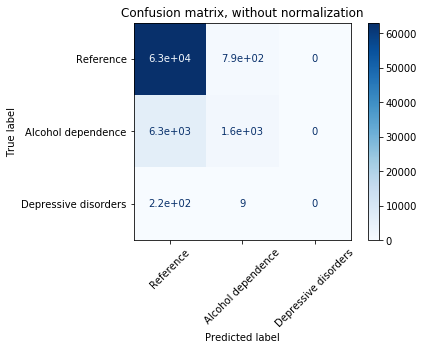

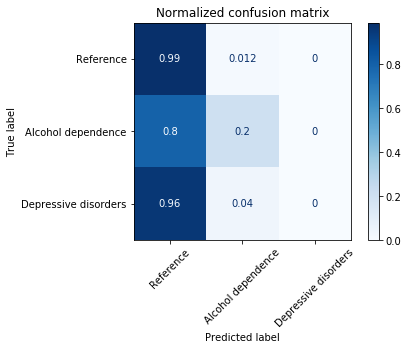

()

In [23]:
# Grab the confusion matrix function
from teds_script import model_confusion_matrix

# Run the confusion matrix function
model_confusion_matrix(user_combined1, user_combined2, user_combined3, 
                           TEDS_X_test, TEDS_Y_test, best_grid_randomsearch, TEDS_X_train, TEDS_Y_train)

## Step 7 - Export the data and models

### Exporting overview:

Finally, once we have completed the workflow, it is also important to export the end products. This workflow exports the model and cleaned data as pickles.

In [24]:
# Grab the export function
from teds_script import export_fun

# Run the export function
export_fun(best_grid_randomsearch, TEDS_Aicf)

The model has been saved as a pickle file: Final_TEDS_A_model.sav.
The data has been saved as a .csv and pickle format: TEDSA_2015_2017_Final


()

## Notes on limitations & future expansions

There are several limitations for this workflow that could be improved in the future. The first limitation is that the data can only be imported from the beginning "unclean" state, that is, straight from the TEDS-A repository. It would be better if the user could import a prepared dataset or a pickle of a dataset previously passed through the workflow. 

It would also be beneficial if the user could collapse the target into more than three categories and could select from a range of modeling methods. These limitations, and others, could be addressed by adding additional functionality and decision trees for the workflow.

Aesthetically, it would be nice to impliment subplots that can consolidate the plot and table output in a more visually pleasing manner.

Finally, it would be beneficial to impliment more automation of the workflow. For instance, it would be helpful if the user could upload a document with their desired input and have that file passed through the entire pipeline (with more pipeline functionality). Though the format of the data does not leave too much room for model choice, it is also possible that additional modeling methods could be passed through a pipeline to provide the user with additional modeling options.

## Citations

Cho, G., Yim, J., Choi, Y., Ko, J., & Lee, S. H. (2019, April 1). Review of machine learning algorithms for diagnosing mental 
    illness. Psychiatry Investigation. Korean Neuropsychiatric Association. https://doi.org/10.30773/pi.2018.12.21.2

scikit-learn.org. (2020). scikit-learn: machine learning in Python — scikit-learn 0.22.2 documentation. 
    Retrieved April 29, 2020, from https://scikit-learn.org/stable/

Silva, M., Loureiro, A., & Cardoso, G. (2016). Social determinants of mental health: A review of the evidence. 
    European Journal of Psychiatry. 
    Retrieved from http://scielo.isciii.es/scielo.php?script=sci_arttext&pid=S0213-61632016000400004